In [2]:
#file= '2022090800_AET.nc'
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
from mpl_toolkits.basemap import Basemap

In [3]:
ds=nc.Dataset('2022090800_Day.nc')
print(ds.variables.keys())

lat= ds.variables['latitude'][:]
lon= ds.variables['longitude'][:]
data=ds.variables['DPT_2maboveground'][0]
print(data)

lon0,lat0=np.meshgrid(lon,lat)
print(lat.shape,lon.shape,data.shape)
print(data.min())
print(data.max())

dict_keys(['latitude', 'longitude', 'time', 'PRES_surface', 'TMP_2maboveground', 'DPT_2maboveground', 'RH_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground', 'APCP_surface'])
[[296.      296.1     296.1     ... 297.4     297.30002 297.30002]
 [296.1     295.9     295.9     ... 297.30002 297.30002 297.30002]
 [296.1     295.9     295.9     ... 297.4     297.30002 297.30002]
 ...
 [291.2     291.1     291.      ... 274.7     274.7     274.80002]
 [291.2     291.1     291.      ... 274.7     274.80002 274.9    ]
 [291.2     291.2     291.2     ... 274.7     274.9     275.     ]]
(1850,) (1950,) (1850, 1950)
192.1
304.7


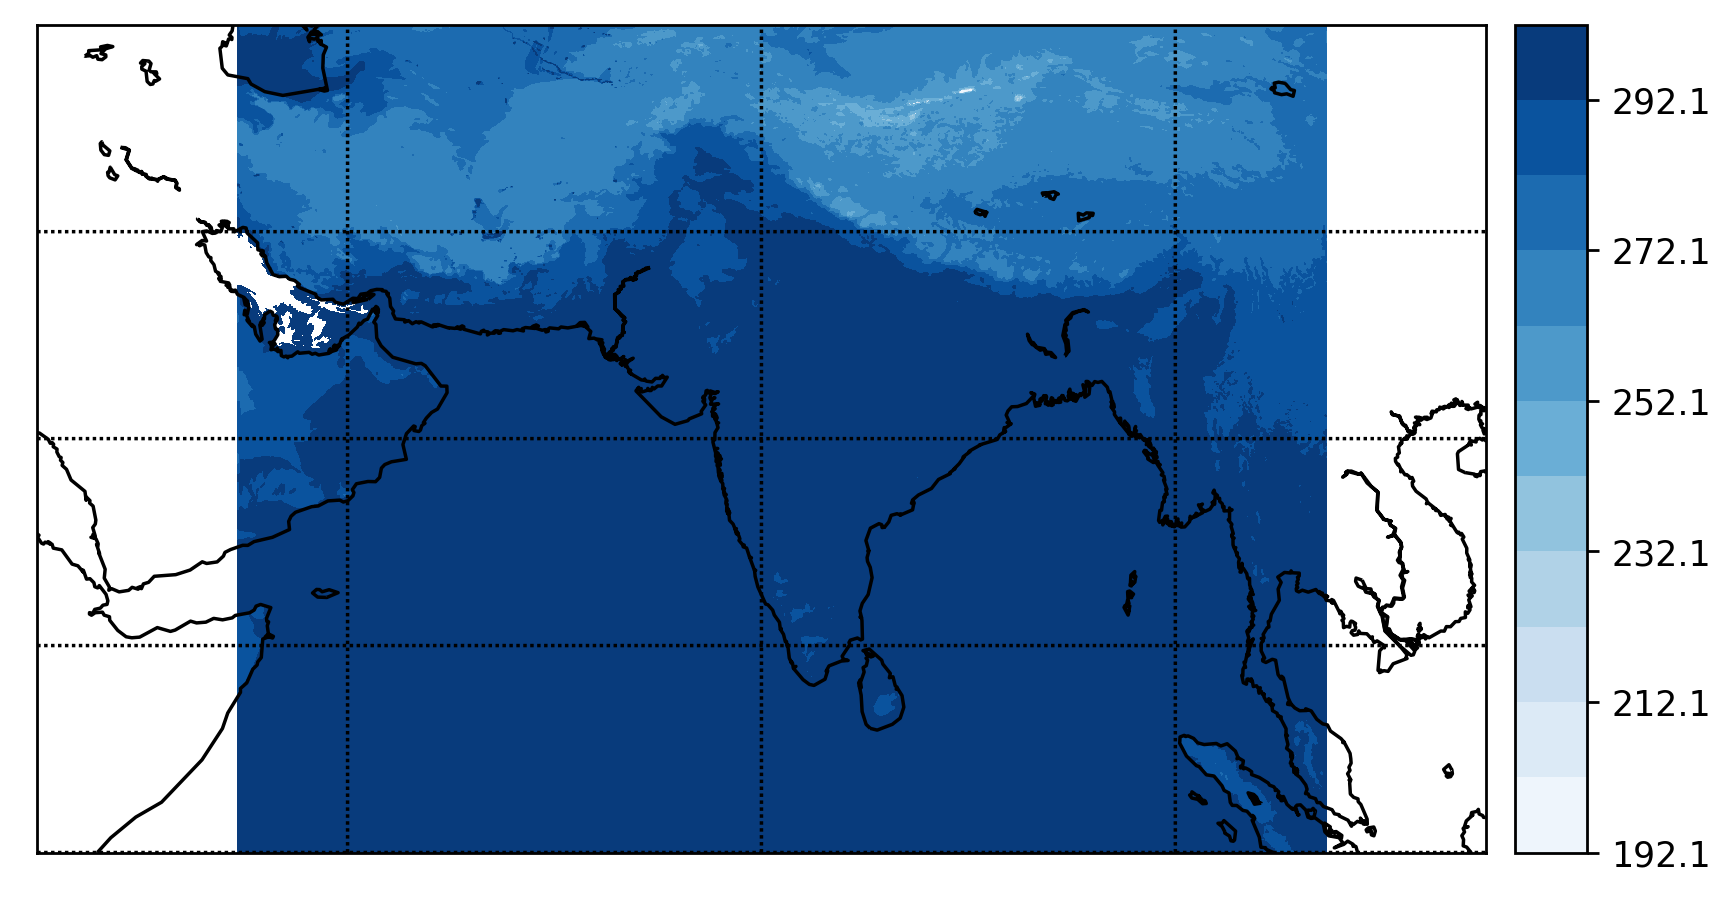

In [4]:
m=Basemap(projection='cyl',llcrnrlat=0,urcrnrlat=40,llcrnrlon=40,urcrnrlon=110,resolution='l')
fig=plt.figure(figsize=(8,8),dpi=250)
m.drawcoastlines()
clev=np.arange(data.min(),data.max(),10)
parallels=np.arange(0,40,10)
m.drawparallels(parallels)
meridians=np.arange(55,110,20)
m.drawmeridians(meridians)
p=m.contourf(lon0,lat0,data,clev,cmap='Blues')
cbar=m.colorbar(p,location='right')
plt.show()